In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
base_path = os.getcwd()
df_gimpo_to_jeju = pd.read_csv(base_path+'/crawled_csv/flight_gimpo_to_jeju.csv', names=['airline', 'departure_time', 'arrival_time', 'flight_time', 'seat_class', 'price', 'date', 'day'])
df_jeju_to_gimpo = pd.read_csv(base_path+'/crawled_csv/flight_jeju_to_gimpo.csv', names=['airline', 'departure_time', 'arrival_time', 'flight_time', 'seat_class', 'price', 'date', 'day'])


In [3]:
df_gimpo_to_jeju.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7355 entries, 0 to 7354
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   airline         7355 non-null   object
 1   departure_time  7355 non-null   object
 2   arrival_time    7355 non-null   object
 3   flight_time     7355 non-null   object
 4   seat_class      7355 non-null   object
 5   price           7355 non-null   object
 6   date            7355 non-null   object
 7   day             7327 non-null   object
dtypes: object(8)
memory usage: 459.8+ KB


In [4]:
df_jeju_to_gimpo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6478 entries, 0 to 6477
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   airline         6478 non-null   object
 1   departure_time  6478 non-null   object
 2   arrival_time    6478 non-null   object
 3   flight_time     6478 non-null   object
 4   seat_class      6478 non-null   object
 5   price           6478 non-null   object
 6   date            6478 non-null   object
 7   day             6440 non-null   object
dtypes: object(8)
memory usage: 405.0+ KB


## 결측치 처리

In [5]:
df_gimpo_to_jeju[df_gimpo_to_jeju.day.isnull()].head()

,airline,departure_time,arrival_time,flight_time,seat_class,price,date,day
1322,에어부산,17:35GMP,18:55CJU,01시간20분,"특가석-수하물유료23,900원~",06.07,수,NaN
1337,에어부산,18:10GMP,19:20CJU,01시간10분,"특가석-수하물유료23,900원~",06.07,수,NaN
1439,티웨이항공,07:00GMP,08:10CJU,01시간10분,"특가석-환불불가69,900원~",06.08,목,NaN
1956,티웨이항공,14:05GMP,15:15CJU,01시간10분,"특가석-환불불가79,900원~",06.10,토,NaN
2188,티웨이항공,12:50GMP,14:00CJU,01시간10분,"특가석-환불불가79,900원~",06.11,일,NaN


In [6]:
df_jeju_to_gimpo[df_jeju_to_gimpo.day.isnull()].head()

,airline,departure_time,arrival_time,flight_time,seat_class,price,date,day
202,티웨이항공,19:25CJU,20:35GMP,01시간10분,"특가석-환불불가69,900원~",06.01,목,NaN
1526,티웨이항공,13:30CJU,14:40GMP,01시간10분,"특가석-환불불가86,900원~",06.09,금,NaN
1854,티웨이항공,08:45CJU,09:55GMP,01시간10분,"특가석-환불불가79,900원~",06.11,일,NaN
1878,티웨이항공,10:00CJU,11:10GMP,01시간10분,"특가석-환불불가109,900원~",06.11,일,NaN
2009,티웨이항공,11:05CJU,12:15GMP,01시간10분,"특가석-환불불가77,900원~",06.12,월,NaN


In [8]:
def clean_null (df):
    temp_df = df[df.day.isnull()]

    ## seat_class 특가석만 남기고 가격과 분리
    temp_list = temp_df.seat_class.str.split(r'-\D+')

    ## price와 date 한칸씩 오른쪽으로 이동
    temp_df['day'] = temp_df['date']
    temp_df['date'] = temp_df['price']

    ## seat_class와 price 다시 설정
    temp_df.seat_class = temp_list.str[0]
    temp_df.price = temp_list.str[1]

    df[df.day.isnull()] = temp_df
    return df

In [9]:
df_gimpo_to_jeju = clean_null(df_gimpo_to_jeju)
df_jeju_to_gimpo = clean_null(df_jeju_to_gimpo)

/var/folders/72/sf0gd2_15c7bv2klzkjcqt580000gn/T/ipykernel_7346/646394478.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['day'] = temp_df['date']
/var/folders/72/sf0gd2_15c7bv2klzkjcqt580000gn/T/ipykernel_7346/646394478.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['date'] = temp_df['price']
/var/folders/72/sf0gd2_15c7bv2klzkjcqt580000gn/T/ipykernel_7346/646394478.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

In [10]:
df_gimpo_to_jeju.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7355 entries, 0 to 7354
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   airline         7355 non-null   object
 1   departure_time  7355 non-null   object
 2   arrival_time    7355 non-null   object
 3   flight_time     7355 non-null   object
 4   seat_class      7355 non-null   object
 5   price           7355 non-null   object
 6   date            7355 non-null   object
 7   day             7355 non-null   object
dtypes: object(8)
memory usage: 459.8+ KB


In [11]:
df_jeju_to_gimpo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6478 entries, 0 to 6477
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   airline         6478 non-null   object
 1   departure_time  6478 non-null   object
 2   arrival_time    6478 non-null   object
 3   flight_time     6478 non-null   object
 4   seat_class      6478 non-null   object
 5   price           6478 non-null   object
 6   date            6478 non-null   object
 7   day             6478 non-null   object
dtypes: object(8)
memory usage: 405.0+ KB


## 전처리

In [12]:
temp_df = df_jeju_to_gimpo.copy()
temp_df

,airline,departure_time,arrival_time,flight_time,seat_class,price,date,day
0,아시아나항공,06:30CJU,07:40GMP,01시간10분,특가석,"36,900원~",06.01,목
1,아시아나항공,06:30CJU,07:40GMP,01시간10분,할인석,"57,900원~",06.01,목
2,아시아나항공,06:30CJU,07:40GMP,01시간10분,일반석,"100,900원~",06.01,목
3,아시아나항공,06:40CJU,07:50GMP,01시간10분,특가석,"33,900원~",06.01,목
4,아시아나항공,06:40CJU,07:50GMP,01시간10분,할인석,"57,900원~",06.01,목
...,...,...,...,...,...,...,...,...
6473,제주항공,21:20CJU,22:30GMP,01시간10분,일반석,"99,900원~",06.30,금
6474,진에어,21:20CJU,22:30GMP,01시간10분,일반석,"99,900원~",06.30,금
6475,진에어,21:20CJU,22:30GMP,01시간10분,비즈니스석,"159,900원~",06.30,금
6476,이스타항공,21:25CJU,22:35GMP,01시간10분,할인석,"75,800원~",06.30,금


In [13]:
temp_df.date.str.replace(r'.', '')

/var/folders/72/sf0gd2_15c7bv2klzkjcqt580000gn/T/ipykernel_7346/852670962.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  temp_df.date.str.replace(r'.', '')


0       0601
1       0601
2       0601
3       0601
4       0601
        ... 
6473    0630
6474    0630
6475    0630
6476    0630
6477    0630
Name: date, Length: 6478, dtype: object

In [15]:
### 전처리 함수
def preprocessing(df):
    
    ## 시간(departure_time, arrival_time)열 형식 변경
    # :, 뒤에 GMP, CJU 제거
    df.departure_time = df.departure_time.str[:-3]
    df.arrival_time = df.arrival_time.str[:-3]
    
    df.departure_time = df.departure_time.str.replace(':', '')
    df.arrival_time = df.arrival_time.str.replace(':','')

    # str -> int로 변경
    df[['departure_time', 'arrival_time']] = df[['departure_time', 'arrival_time']].astype('int')

    ## price 열 형식 변경
    # , ~ 원 없애기
    df.price = df.price.str.replace(r',|~|원', '')

    # str -> int로 변경
    df.price = df.price.astype('int')

    
    ## date 열 형식 변경
    # , 없애기
    df.date = df.date.str.replace(r'.', '')

    # str -> int로 변경
    df.date = df.date.astype('int')

    # flight_time *시간 *분으로 형식 통일
    df.flight_time = df.flight_time.str.replace('시간', '시간 ')
    df.flight_time = df.flight_time.str[1:]

In [16]:
preprocessing(df_gimpo_to_jeju)
preprocessing(df_jeju_to_gimpo)

/var/folders/72/sf0gd2_15c7bv2klzkjcqt580000gn/T/ipykernel_7346/1471432304.py:17: FutureWarning: The default value of regex will change from True to False in a future version.
  df.price = df.price.str.replace(r',|~|원', '')
/var/folders/72/sf0gd2_15c7bv2klzkjcqt580000gn/T/ipykernel_7346/1471432304.py:25: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.date = df.date.str.replace(r'.', '')
/var/folders/72/sf0gd2_15c7bv2klzkjcqt580000gn/T/ipykernel_7346/1471432304.py:17: FutureWarning: The default value of regex will change from True to False in a future version.
  df.price = df.price.str.replace(r',|~|원', '')
/var/folders/72/sf0gd2_15c7bv2klzkjcqt580000gn/T/ipykernel_7346/1471432304.py:25: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions 

In [17]:
airline_mark = {'에어서울' : "https://vertical.pstatic.net/vertical/static/flight/airlines/RS.png",

                '진에어' : "https://vertical.pstatic.net/vertical/static/flight/airlines/LJ.png",

                '제주항공' : "https://vertical.pstatic.net/vertical/static/flight/airlines/7C.png",

                '대한항공진에어공동운항' : "https://vertical.pstatic.net/vertical/static/flight/airlines/KE.png",

                '이스타항공' : "https://vertical.pstatic.net/vertical/static/flight/airlines/ZE.png",

                "아시아나항공" : "https://vertical.pstatic.net/vertical/static/flight/airlines/OZ.png",

                "티웨이항공" : "https://vertical.pstatic.net/vertical/static/flight/airlines/TW.png",

                "대한항공" : "https://vertical.pstatic.net/vertical/static/flight/airlines/KE.png",

                "에어부산" : "https://vertical.pstatic.net/vertical/static/flight/airlines/BX.png",

                "하이에어" : "https://vertical.pstatic.net/vertical/static/flight/airlines/4H.png"}

In [18]:
temp = []
for i in range(len(df_gimpo_to_jeju)):
    temp.append(airline_mark[df_gimpo_to_jeju.iloc[i].airline])
mark_url = pd.Series(temp)
df_gimpo_to_jeju['mark_url'] = mark_url

In [19]:
temp = []
for i in range(len(df_jeju_to_gimpo)):
    temp.append(airline_mark[df_jeju_to_gimpo.iloc[i].airline])
mark_url = pd.Series(temp)
df_jeju_to_gimpo['mark_url'] = mark_url

In [20]:
df_gimpo_to_jeju = df_gimpo_to_jeju[['date', 'day', 'departure_time', 'arrival_time', 'flight_time', 'airline', 'seat_class', 'price', 'mark_url']]
df_jeju_to_gimpo = df_jeju_to_gimpo[['date', 'day', 'departure_time', 'arrival_time', 'flight_time', 'airline', 'seat_class', 'price', 'mark_url']]

In [21]:
df_gimpo_to_jeju.head()

,date,day,departure_time,arrival_time,flight_time,airline,seat_class,price,mark_url
0,601,목,600,700,1시간 00분,에어서울,할인석,40800,https://vertical.pstatic.net/vertical/static/f...
1,601,목,600,700,1시간 00분,에어서울,일반석,84900,https://vertical.pstatic.net/vertical/static/f...
2,601,목,605,720,1시간 15분,진에어,할인석,38800,https://vertical.pstatic.net/vertical/static/f...
3,601,목,605,715,1시간 10분,제주항공,특가석,39800,https://vertical.pstatic.net/vertical/static/f...
4,601,목,605,715,1시간 10분,제주항공,할인석,42400,https://vertical.pstatic.net/vertical/static/f...


In [22]:
df_jeju_to_gimpo.head()

,date,day,departure_time,arrival_time,flight_time,airline,seat_class,price,mark_url
0,601,목,630,740,1시간 10분,아시아나항공,특가석,36900,https://vertical.pstatic.net/vertical/static/f...
1,601,목,630,740,1시간 10분,아시아나항공,할인석,57900,https://vertical.pstatic.net/vertical/static/f...
2,601,목,630,740,1시간 10분,아시아나항공,일반석,100900,https://vertical.pstatic.net/vertical/static/f...
3,601,목,640,750,1시간 10분,아시아나항공,특가석,33900,https://vertical.pstatic.net/vertical/static/f...
4,601,목,640,750,1시간 10분,아시아나항공,할인석,57900,https://vertical.pstatic.net/vertical/static/f...


(array([  83.,  234.,  222.,  290.,  359.,  429.,  721., 1091.,  804.,
         602.,  193.,  419.,   46.,  274.,   41.,  136.,  223.,  256.,
           5.,   50.]),
 array([ 25800.,  34105.,  42410.,  50715.,  59020.,  67325.,  75630.,
         83935.,  92240., 100545., 108850., 117155., 125460., 133765.,
        142070., 150375., 158680., 166985., 175290., 183595., 191900.]),
 <BarContainer object of 20 artists>)

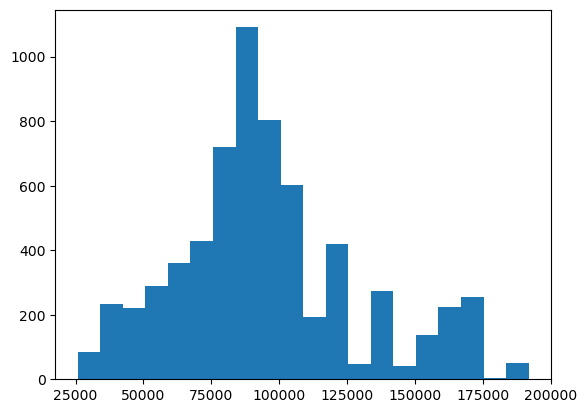

In [105]:
plt.hist(df_jeju_to_gimpo.price, bins=20)

(array([ 166.,  561.,  309.,  494.,  651.,  340.,  458., 1181.,  240.,
         704.,  140.,  791.,  103.,  412.,   14.,  178.,  195.,  247.,
          12.,  159.]),
 array([ 23180.,  31616.,  40052.,  48488.,  56924.,  65360.,  73796.,
         82232.,  90668.,  99104., 107540., 115976., 124412., 132848.,
        141284., 149720., 158156., 166592., 175028., 183464., 191900.]),
 <BarContainer object of 20 artists>)

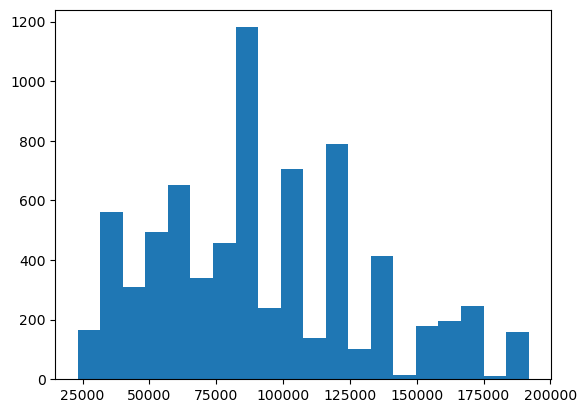

In [106]:
plt.hist(df_gimpo_to_jeju.price, bins=20)

## CSV 파일 저장

In [107]:
df_gimpo_to_jeju.to_csv(base_path + '/db_flight_gimpo_to_jeju.csv', index=False)
df_jeju_to_gimpo.to_csv(base_path + '/db_flight_jeju_to_gimpo.csv', index=False)

## DB 연결

In [109]:
import psycopg2
import csv

host = 'drona.db.elephantsql.com'
user = 'bnwptvqk'
password = 'RWLldWbYTfneg_E7-NYZ0YeUH75vKq1d'
database = 'bnwptvqk'

conn = psycopg2.connect(
    host=host,
    user=user,
    password=password,
    database=database)

cur = conn.cursor()

## 김포 -> 제주 항공편
cur.execute("DROP TABLE IF EXISTS flight_gimpo_jeju;")
cur.execute("""CREATE TABLE IF NOT EXISTS flight_gimpo_jeju(
                date INTEGER,
                day VARCHAR(200),
                departure_time INTEGER,
                arrival_time INTEGER,
                flight_time VARCHAR(200),
                airline VARCHAR(200),
                seat_class VARCHAR(200),
                price INTEGER,
                mark_url VARCHAR(200)
                
);""")

with open(base_path +'/db_flight_gimpo_to_jeju.csv', 'r', newline='') as f:
    r = csv.reader(f)
    next(r)
    for row in r:
        cur.execute("""INSERT INTO flight_gimpo_jeju VALUES(
                    %s, %s, %s, %s, %s, %s, %s, %s, %s);""", tuple(row))

## 김포 -> 제주 항공편
cur.execute("DROP TABLE IF EXISTS flight_jeju_gimpo;")
cur.execute("""CREATE TABLE IF NOT EXISTS flight_jeju_gimpo(
                date INTEGER,
                day VARCHAR(200),
                departure_time INTEGER,
                arrival_time INTEGER,
                flight_time VARCHAR(200),
                airline VARCHAR(200),
                seat_class VARCHAR(200),
                price INTEGER,
                mark_url VARCHAR(200)
);""")

with open(base_path +'/db_flight_jeju_to_gimpo.csv', 'r', newline='') as f:
    r = csv.reader(f)
    next(r)
    for row in r:
        cur.execute("""INSERT INTO flight_jeju_gimpo VALUES(
                    %s, %s, %s, %s, %s, %s, %s, %s, %s);""", tuple(row))

conn.commit()
conn.close()
cur.close()